### 310. Minimum Height Trees - 10/6/2024

In [ ]:
############################### Improvement Table ###########################################
"""
Repitition # -  Time Taken   


"""

### Model Answer

### 1st Repitition

In [ ]:
"""
UMPIRE


U: we have given 'n' nodes, and a adjacency list and we can select our own root
node
our job is to 
    1. figure out the minimum height trees, i.e. it's height is smallest
        among all possible combination where we select various node as root
    2. Once, we a minimum height trees, we need to return a list of node    
        which when noted as root, results in the minimum height tree

M: BFS + for loop + queue
1: [2, 3] but it could be
2: 1, 3: 1

Q1. for example we have the following edge: [1, 0]
seraching using '1' is easier than searching using '0'

- two adjacencyMatrix
    - 1. key = i, value = j's
    - 2. key = j, value = i's
- visitedSet: where we add both (i, j) and (j, i)
- heightList: stores the height of each node when it's 
    consider as a root. Here: index - represents a node

- using for loops, we consider every node as a root node
- adding the curNode to a que and using while loop
- find the neibhoring nodes using the adjacencyMatrix
- add all edges into the visistedSet or check beforehand if that edge
    has already been used or not
- after which add them into the que
- after while is over, record the height of the tree
- also update minHeight variable
- Once every node is considered as root node, using the minHeight
- figure out the nodes' which result in that minHeight

"""
class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        idic = defaultdict(list)
        jdic = defaultdict(list)

        vSet = set()
        heightList = [0] * (n)
        minHeight = 1000

        for i, j in edges:
            idic[i].append(j)
            jdic[j].append(i)

        for curRoot in range(n):
            que = [curRoot]
            tempHeight = 0

            while que:
                curNode = que.pop(0)
                if idic[curNode]: # checking of edges
                    next = idic[curNode]
                elif jdic[curRoot]:
                    next = jdic[curNode]

                vSet.add((curNode, next))
                vSet.add((next,curNode))

                for nei in next:
                    







### 2nd Attempt - 10/6/2024

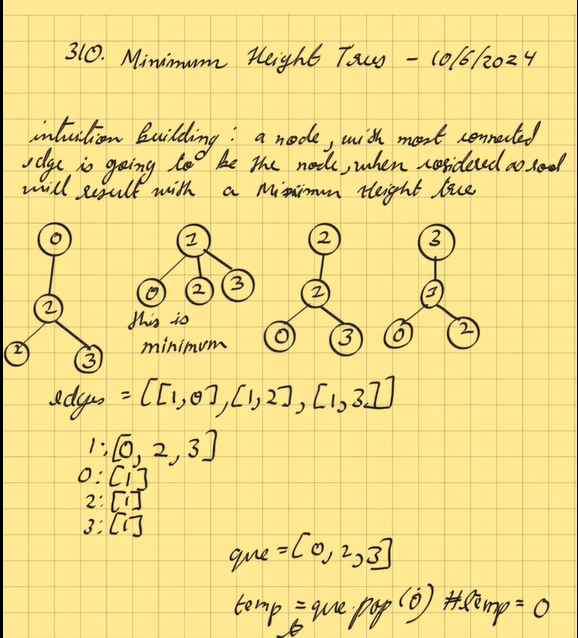

In [ ]:
"""
My 1st attempt was wrong an better approach is to
remove nodes with degree == 1, and keeping on removing
until we have one or two which are known as centriods

"""

class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        if n == 1:
            return [0]
        

        adjList = defaultdict(list)
        for i, j in edges:
            adjList[i].append(j)
            adjList[j].append(i)

        que = []
        for i in range(n):
            if len(adjList[i]) == 1:
                que.append(i)


        remNode = n
        while remNode > 2:
            queNodes = len(que)
            remNode -= queNodes

            for _ in range(queNodes):
                curNode = que.pop(0)
                nei = adjList[curNode].pop()
                adjList[nei].remove(curNode)

                if len(adjList[nei]) == 1:
                    que.append(nei)

        return list(que)

        
    

### 3rd Attempt - 10/7/2024

In [ ]:
"""
UMPIRE

U: we are given a number of nodes and a list of edges between these nodes
our job is to return the node which when considered as a root node
results in a minimum height tree

M: BFS + intutitive

intutiion:

In general a node having the most edges would result when considered a root node
in a minimum height tree

P:
1. we will use the above intutiion, when we will start by removing
nodes with edges == 1, then keep repeating this process, until we
have 1 or 2 nodes, which would be called "centriods"

2. to acompplish above
    - create a adajency matrix, which contains all edges (i ->j, j -> i)
    - now collect the nodes which edge == 1, in a queue
    - make a count of nodes which are remaining
    - using while loop until no. of nodes > 2
    - in while loop remove nodes from the que
    - remove all the edges connected to this node
        - two pop calls here, cuz bidirection

    - after while loop is processed, return queue.toList()

- Test Case
n = 4, edges = [[1, 0], [1, 2], [1, 3]]

adjList: {
1: [0,2,3],
0: [1],
2: [1],
3: [1]
}
que = [0, 2, 3]

"""

class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        adjList = defaultdict(list)

        for i, j in edges:
            adjList[i].append(j)
            adjList[j].append(i)

        que = []
        for i in range(n):
            if len(adjList[i]) == 1:
                que.append(i)

        
        remNode = n
        while remNode > 2:
            queNode = len(que)
            remNode -= queNode

            for _ in range(queNode):
                curNode = que.pop(0)
                nei = adjList[curNode].pop(0)
                adjList[nei].remove(curNode)

                if len(adjList[nei]) == 1:
                    que.append(nei)

        return list(que)




### 2nd Repetition - 10/13/2024

In [ ]:
class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        # in this question we are going to use 
        # graph property called in-degrees
        # which is no. of nodes/ vertex attached to it
        # Here the logic is to remove vertices starting with in-degree == 1
        # and keep on continuing until we have atleast
        # 2 remaining trees, which when used as a root node
        # results in a minimum height trees
        # 

        if n == 1:
            return [0]

        adjList = defaultdict(list)
        inDegree = defaultdict(int)

        for i, j in edges:
            adjList[i].append(j)
            adjList[j].append(i)

            inDegree[i] += 1
            inDegree[j] += 1
        

        que = []
        for i in range(n):
            if inDegree[i] == 1:
                que.append(i)

        renaming = n
        while (renaming > 2):
            queNode = len(que)
            renaming -= queNode

            for _ in range(queNode):
                curNode = que.pop(0)

                nei = adjList[curNode].pop(0)
                adjList[nei].remove(curNode)

                if len(adjList[nei]) == 1:
                    que.append(nei)

        return list(que)



In [ ]:
class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        """
            UMPIRE
            U: we are given a edgeList, which tell us edges between nodes 
            our job is to find the node which results in us getting a minimum height tree

            M: BFS (basically we are going to use que)

            P:
            1. we are going to create a adjacenyList
            2. find nodes with degree of 1
            3. remove these nodes from the dictionary and again find hte node with degree of 1
            4. continue the above steps until you have 1 or 2 nodes remaining

        """

        if n == 1:
            return [0]

        adjList = defaultdict(list)
        que = []
        # [[1,0], [1,2], [1, 3]]
        """ adjList = {1: [0, 2, 3],
                     2: [1],
                     3: [1],
                     0: [1]}
                     """

        for i, j in edges:
            adjList[i].append(j)
            adjList[j].append(i)
            # we are doing both because the edges are bi-directional

        for i in adjList:
            # Collecting all the nodes with degree == 1
            if len(adjList[i]) == 1:
                print("Hello")
                que.append(i)

        remNode = n

        while remNode > 2 :
            queNode = len(que)
            remNode -= queNode

            for _ in range(queNode):
                curNode = que.pop(0)
                nei = adjList[curNode].pop(0)
                adjList[nei].remove(curNode)

                if len(adjList[nei]) == 1:
                    que.append(nei)

        return list(que)




        

        

### 3rd Repetition - 11/24/2024 - 23 mins - with little help as possible

In [ ]:
class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        # inedge : {3: [0, 1, 2, 4], 0: [3], 1: [3], 2: [3], 4:[3], 4:[5]}
        # that our in-edge map, that we are going to use to remove nodes with 1 edges
        # and keeping repeating the procss until we have 2 renaming nodes

        # Step 1: creating adjaency List

        if n == 1:
            return [0]  
        if n == 2:
            return [0, 1] 

        inedge = defaultdict(list) 

        for i, j in edges:
            inedge[i].append(j)
            inedge[j].append(i)


        # Step 2: Queue with nodes have 1 edge
        que = deque()
        for node in inedge:
            if len(inedge[node]) == 1:
                que.append(node)
                print("Appending these values into the que: ", node)

        leftNode = n
        while leftNode > 2:
            queNode = len(que)
            leftNode -= queNode

            for i in range(queNode):
                curNode = que.popleft()
                # Here we remove from left-hand side because 
                # first we want to process node with 1 edge first
                # also during this we are also appenidn values in the end
                # which messes with process and results in wrong values
                adjNode = inedge[curNode].pop()

                inedge[adjNode].remove(curNode)

                if len(inedge[adjNode]) == 1:
                    que.append(adjNode)

        print("Que: ", que)

        return list(que)


        print(inedge)
        